In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setting up the working directory
import os

WORK_DIR = '/content/drive/MyDrive/WasAdvGAN/mnist'
os.chdir(WORK_DIR)
print(os.listdir('./'))

DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)
print(os.listdir(DATA_DIR))

MODEL_DIR = 'saved_models'
os.makedirs(MODEL_DIR, exist_ok=True)
print(os.listdir(MODEL_DIR))

PLOT_DIR = 'plots'
os.makedirs(PLOT_DIR, exist_ok=True)
print(os.listdir(PLOT_DIR))

ADV_DATA_DIR = 'data/advgan'
os.makedirs(ADV_DATA_DIR, exist_ok=True)
print(os.listdir(ADV_DATA_DIR))

WAGAN_DATA_DIR = 'data/wagan'
os.makedirs(WAGAN_DATA_DIR, exist_ok=True)
print(os.listdir(WAGAN_DATA_DIR))

['data', 'Experiments.ipynb', 'WAGAN-beta_zero.ipynb', 'models.py', '__pycache__', 'saved_models', 'plots', 'advgan', 'wagan', 'advgan.py', 'pipeline.py', 'wasserstein.py', 'AdvGAN.ipynb', 'wagan.py', 'WAGAN-beta_plus.ipynb', 'WAGAN-beta_minus.ipynb']
['wagan', 'MNIST', 'advgan']
['model_original.pth', 'config_original.json', 'model_advgan_original.pth', 'config_advgan_original.json']
['training_error_original.png']
['adv_test_images_original.pickle', 'test_labels_original.pickle', 'adv_train_images_original.pickle', 'train_labels_original.pickle']
['adv_train_images_beta_plus.pickle', 'train_labels_beta_plus.pickle', 'adv_test_images_beta_plus.pickle', 'test_labels_beta_plus.pickle', 'adv_train_images_beta_zero.pickle', 'adv_test_images_beta_zero.pickle', 'test_labels_beta_zero.pickle', 'train_labels_beta_zero.pickle']


In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import torch
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from pipeline import TargetModel_Pipeline

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


### 1. Original Data

In [ ]:
# Setting up training config
config = dict()
config['name'] = 'original'
config['batch_size'] = 256
config['total_epochs'] = 50
config['cutoff_epoch'] = 20
config['early_learning_rate'] = 0.001
config['late_learning_rate'] = 0.0001

for key, value in config.items():
    print(key, ' : ', value)

name  :  original
batch_size  :  256
total_epochs  :  50
cutoff_epoch  :  20
early_learning_rate  :  0.001
late_learning_rate  :  0.0001


In [ ]:
pipeline = TargetModel_Pipeline(device, config, MODEL_DIR)

In [ ]:
# Loading the original dataset
mnist_train = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=False)
train_dataloader = DataLoader(mnist_train, batch_size=pipeline.config['batch_size'], shuffle=False, num_workers=1)

In [ ]:
# Training the model
loss_epochs = pipeline.fit(train_dataloader)

  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 0: 105.088387


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 1: 25.124315


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 2: 17.749279


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 3: 14.150783


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 4: 11.403878


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 5: 10.099132


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 6: 8.790202


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 7: 7.218193


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 8: 7.092393


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 9: 6.289538


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 10: 5.931740


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 11: 5.127106


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 12: 4.624875


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 13: 4.919980


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 14: 4.094120


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 15: 3.629219


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 16: 3.404555


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 17: 3.446033


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 18: 3.329091


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 19: 3.219798


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 20: 1.855937


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 21: 1.129419


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 22: 0.965347


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 23: 0.923307


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 24: 0.804146


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 25: 0.628485


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 26: 0.550891


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 27: 0.572136


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 28: 0.632727


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 29: 0.476779


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 30: 0.530954


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 31: 0.512648


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 32: 0.514129


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 33: 0.394716


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 34: 0.472676


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 35: 0.391173


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 36: 0.404587


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 37: 0.367505


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 38: 0.433346


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 39: 0.398237


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 40: 0.286970


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 41: 0.418188


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 42: 0.286949


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 43: 0.360662


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 44: 0.364244


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 45: 0.268573


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 46: 0.252584


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 47: 0.254454


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 48: 0.298810


  0%|          | 0/235 [00:00<?, ?it/s]

loss in epoch 49: 0.254424


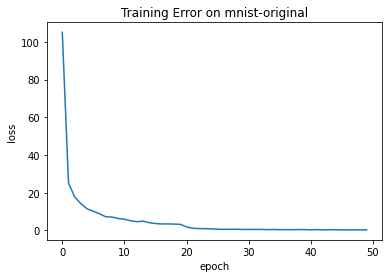

In [ ]:
plt.plot(loss_epochs, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Error on mnist-'+str(config['name']))
plt.savefig(PLOT_DIR+'/training_error_'+str(config['name'])+ '.png')

In [ ]:
# MNIST test dataset
mnist_test = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=False)
test_dataloader = DataLoader(mnist_test, batch_size=pipeline.config['batch_size'], shuffle=True, num_workers=1)
# Testing the model
accuracy = pipeline.eval(test_dataloader)
print(accuracy)

  0%|          | 0/40 [00:00<?, ?it/s]

accuracy in testing set: 0.992700

0.9927


#### Extra -  Loading and evaluating a new model 

In [ ]:
# Loading a trained model in an empty pipeline
config = dict()
pipeline = TargetModel_Pipeline(device, config, MODEL_DIR)

In [ ]:
pipeline.load(config_name='original')

In [ ]:
# MNIST test dataset
mnist_test = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=False)
test_dataloader = DataLoader(mnist_test, batch_size=pipeline.config['batch_size'], shuffle=True, num_workers=1)
# Testing the model
accuracy = pipeline.eval(test_dataloader)
print(accuracy)

  0%|          | 0/40 [00:00<?, ?it/s]

accuracy in testing set: 0.992300

0.9923


### 2. Adverserial Data - AdvGAN

In [ ]:
advgan_config_name = 'original'

# Setting up training config
config = dict()
config['name'] = 'advgan_'+advgan_config_name
config['batch_size'] = 128
config['total_epochs'] = 30
config['cutoff_epoch'] = 20
config['early_learning_rate'] = 0.001
config['late_learning_rate'] = 0.0001

for key, value in config.items():
    print(key, ' : ', value)

name  :  advgan_original
batch_size  :  128
total_epochs  :  30
cutoff_epoch  :  20
early_learning_rate  :  0.001
late_learning_rate  :  0.0001


In [ ]:
pipeline = TargetModel_Pipeline(device, config, MODEL_DIR)

In [ ]:
with open(ADV_DATA_DIR + '/adv_train_images_' + advgan_config_name + '.pickle', 'rb') as handle:
    adv_images_train = pickle.load(handle)

with open(ADV_DATA_DIR + '/train_labels_' + advgan_config_name + '.pickle', 'rb') as handle:
    real_labels_train = pickle.load(handle)

print(adv_images_train.shape)
print(real_labels_train.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [ ]:
with open(ADV_DATA_DIR + '/adv_test_images_' + advgan_config_name + '.pickle', 'rb') as handle:
    adv_images_test = pickle.load(handle)

with open(ADV_DATA_DIR + '/test_labels_' + advgan_config_name + '.pickle', 'rb') as handle:
    real_labels_test = pickle.load(handle)

print(adv_images_test.shape)
print(real_labels_test.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [ ]:
train_dataset = list(zip(adv_images_train, real_labels_train))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config['batch_size'])

loss_epochs = pipeline.fit(train_dataloader)

  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 0: 185.124146


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 1: 58.475075


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 2: 43.327438


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 3: 35.471306


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 4: 30.116631


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 5: 26.453287


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 6: 23.087580


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 7: 20.495823


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 8: 17.971542


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 9: 15.658463


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 10: 15.068599


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 11: 14.765401


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 12: 12.412416


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 13: 12.430069


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 14: 10.430359


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 15: 9.782342


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 16: 10.423141


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 17: 9.446358


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 18: 7.720274


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 19: 8.363915


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 20: 5.345147


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 21: 3.442030


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 22: 2.747517


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 23: 2.450466


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 24: 1.937125


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 25: 2.089696


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 26: 1.569510


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 27: 1.520159


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 28: 1.445948


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 29: 1.291738


In [ ]:
test_dataset = list(zip(adv_images_test, real_labels_test))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config['batch_size'])

# Testing the model
accuracy = pipeline.eval(test_dataloader)
print(accuracy)

  0%|          | 0/79 [00:00<?, ?it/s]

accuracy in testing set: 0.988900

0.9889


### WAGAN-beta+

In [ ]:
wagan_config_name = 'beta_plus'

# Setting up training config
config = dict()
config['name'] = 'wagan_'+wagan_config_name
config['batch_size'] = 128
config['total_epochs'] = 30
config['cutoff_epoch'] = 20
config['early_learning_rate'] = 0.001
config['late_learning_rate'] = 0.0001

for key, value in config.items():
    print(key, ' : ', value)

name  :  wagan_beta_plus
batch_size  :  128
total_epochs  :  30
cutoff_epoch  :  20
early_learning_rate  :  0.001
late_learning_rate  :  0.0001


In [ ]:
pipeline = TargetModel_Pipeline(device, config, MODEL_DIR)

In [ ]:
with open(WAGAN_DATA_DIR + '/adv_train_images_' + wagan_config_name + '.pickle', 'rb') as handle:
    adv_images_train = pickle.load(handle)

with open(WAGAN_DATA_DIR + '/train_labels_' + wagan_config_name + '.pickle', 'rb') as handle:
    real_labels_train = pickle.load(handle)

print(adv_images_train.shape)
print(real_labels_train.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [ ]:
with open(WAGAN_DATA_DIR + '/adv_test_images_' + wagan_config_name + '.pickle', 'rb') as handle:
    adv_images_test = pickle.load(handle)

with open(WAGAN_DATA_DIR + '/test_labels_' + wagan_config_name + '.pickle', 'rb') as handle:
    real_labels_test = pickle.load(handle)

print(adv_images_test.shape)
print(real_labels_test.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [ ]:
train_dataset = list(zip(adv_images_train, real_labels_train))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config['batch_size'])

loss_epochs = pipeline.fit(train_dataloader)

  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 0: 189.578064


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 1: 59.351849


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 2: 44.147842


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 3: 38.166485


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 4: 31.271135


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 5: 27.392542


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 6: 24.519335


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 7: 20.852209


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 8: 18.701235


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 9: 17.282055


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 10: 15.718143


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 11: 14.594069


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 12: 12.762259


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 13: 12.471686


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 14: 11.333734


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 15: 10.797571


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 16: 10.396563


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 17: 9.283134


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 18: 8.346241


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 19: 7.984477


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 20: 5.416832


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 21: 3.142945


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 22: 2.619460


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 23: 2.312045


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 24: 2.220688


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 25: 1.867484


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 26: 1.495056


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 27: 1.389460


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 28: 1.469601


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 29: 1.360387


In [ ]:
test_dataset = list(zip(adv_images_test, real_labels_test))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config['batch_size'])

# Testing the model
accuracy = pipeline.eval(test_dataloader)
print(accuracy)

  0%|          | 0/79 [00:00<?, ?it/s]

accuracy in testing set: 0.988900

0.9889


### WAGAN-beta_zero

In [71]:
wagan_config_name = 'beta_zero'

# Setting up training config
config = dict()
config['name'] = 'wagan_'+wagan_config_name
config['batch_size'] = 128
config['total_epochs'] = 10
config['cutoff_epoch'] = 20
config['early_learning_rate'] = 0.001
config['late_learning_rate'] = 0.0001

for key, value in config.items():
    print(key, ' : ', value)

name  :  wagan_beta_zero
batch_size  :  128
total_epochs  :  10
cutoff_epoch  :  20
early_learning_rate  :  0.001
late_learning_rate  :  0.0001


In [72]:
pipeline = TargetModel_Pipeline(device, config, MODEL_DIR)

In [73]:
with open(WAGAN_DATA_DIR + '/adv_train_images_' + wagan_config_name + '.pickle', 'rb') as handle:
    adv_images_train = pickle.load(handle)

with open(WAGAN_DATA_DIR + '/train_labels_' + wagan_config_name + '.pickle', 'rb') as handle:
    real_labels_train = pickle.load(handle)

print(adv_images_train.shape)
print(real_labels_train.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [74]:
with open(WAGAN_DATA_DIR + '/adv_test_images_' + wagan_config_name + '.pickle', 'rb') as handle:
    adv_images_test = pickle.load(handle)

with open(WAGAN_DATA_DIR + '/test_labels_' + wagan_config_name + '.pickle', 'rb') as handle:
    real_labels_test = pickle.load(handle)

print(adv_images_test.shape)
print(real_labels_test.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [75]:
train_dataset = list(zip(adv_images_train, real_labels_train))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config['batch_size'])

loss_epochs = pipeline.fit(train_dataloader)

  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 0: 221.734497


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 1: 70.286339


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 2: 53.042286


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 3: 41.174084


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 4: 35.406242


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 5: 29.990231


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 6: 27.321033


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 7: 23.143406


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 8: 21.111832


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 9: 19.979454


In [76]:
test_dataset = list(zip(adv_images_test, real_labels_test))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config['batch_size'])

# Testing the model
accuracy = pipeline.eval(test_dataloader)
print(accuracy)

  0%|          | 0/79 [00:00<?, ?it/s]

accuracy in testing set: 0.982600

0.9826


### WAGAN-beta-

In [ ]:
wagan_config_name = 'beta_minus'

# Setting up training config
config = dict()
config['name'] = 'wagan_'+wagan_config_name
config['batch_size'] = 128
config['total_epochs'] = 10
config['cutoff_epoch'] = 20
config['early_learning_rate'] = 0.001
config['late_learning_rate'] = 0.0001

for key, value in config.items():
    print(key, ' : ', value)

name  :  wagan_beta_minus
batch_size  :  128
total_epochs  :  10
cutoff_epoch  :  20
early_learning_rate  :  0.001
late_learning_rate  :  0.0001


In [ ]:
pipeline = TargetModel_Pipeline(device, config, MODEL_DIR)

In [ ]:
with open(WAGAN_DATA_DIR + '/adv_train_images_' + wagan_config_name + '.pickle', 'rb') as handle:
    adv_images_train = pickle.load(handle)

with open(WAGAN_DATA_DIR + '/train_labels_' + wagan_config_name + '.pickle', 'rb') as handle:
    real_labels_train = pickle.load(handle)

print(adv_images_train.shape)
print(real_labels_train.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [ ]:
with open(WAGAN_DATA_DIR + '/adv_test_images_' + wagan_config_name + '.pickle', 'rb') as handle:
    adv_images_test = pickle.load(handle)

with open(WAGAN_DATA_DIR + '/test_labels_' + wagan_config_name + '.pickle', 'rb') as handle:
    real_labels_test = pickle.load(handle)

print(adv_images_test.shape)
print(real_labels_test.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [ ]:
train_dataset = list(zip(adv_images_train, real_labels_train))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config['batch_size'])

loss_epochs = pipeline.fit(train_dataloader)

  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 0: 206.325134


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 1: 68.091583


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 2: 49.659115


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 3: 40.166115


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 4: 34.057114


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 5: 28.993063


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 6: 26.847019


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 7: 23.434391


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 8: 20.886471


  0%|          | 0/469 [00:00<?, ?it/s]

loss in epoch 9: 17.548855


In [ ]:
test_dataset = list(zip(adv_images_test, real_labels_test))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config['batch_size'])

# Testing the model
accuracy = pipeline.eval(test_dataloader)
print(accuracy)

  0%|          | 0/79 [00:00<?, ?it/s]

accuracy in testing set: 0.982600

0.9826
